In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#setting the default style for seaborn plots
sns.set_theme(style='darkgrid', palette='dark')

In [4]:
titanic = sns.load_dataset('titanic')

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
# Summary statistics
titanic.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## Basic information

How many people died on this crash?

In [9]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot: xlabel='survived', ylabel='count'>

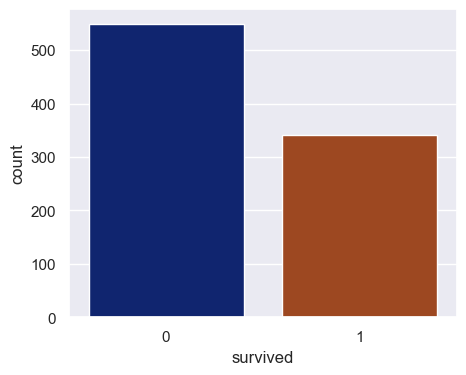

In [12]:
plt.figure(figsize=(5,4))
sns.countplot(titanic, x='survived')
# or sns.catplot(kind='count')

How many people per class were there?

In [14]:
titanic.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

<AxesSubplot: xlabel='pclass', ylabel='count'>

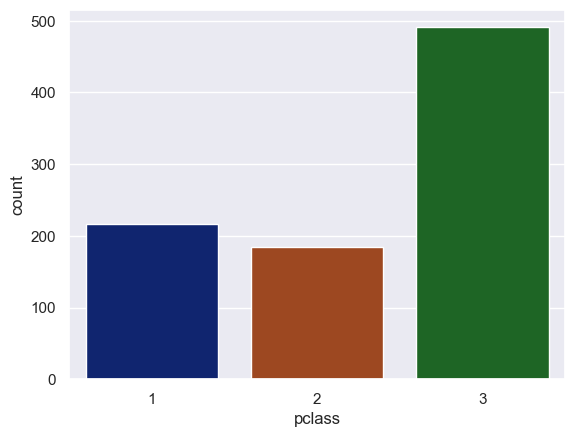

In [16]:
sns.countplot(titanic, x='pclass')

How many people per gender were there?

[Text(0, 0, '577'), Text(0, 0, '314')]

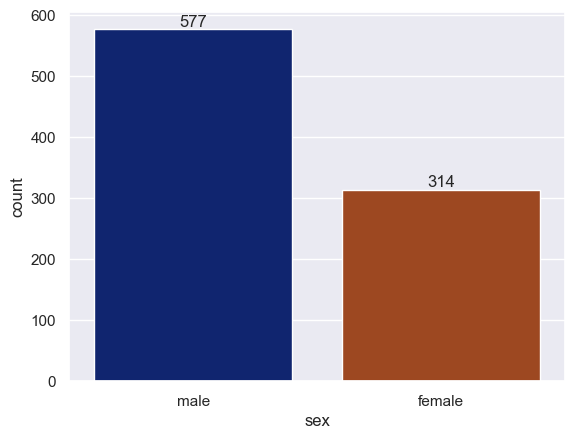

In [19]:
ax = sns.countplot(titanic, x='sex')
ax.bar_label(ax.containers[0])

Display the Share of people who were there:

<AxesSubplot: ylabel='who'>

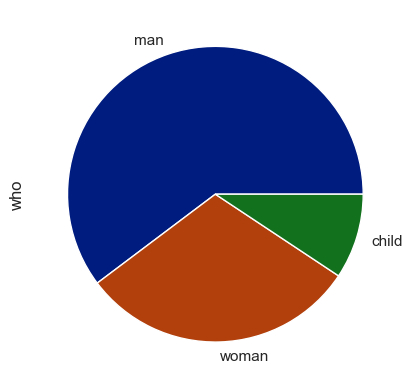

In [24]:
titanic.who.value_counts().plot(kind='pie')

How many unique cities are there in the colimn embark_town?

<AxesSubplot: >

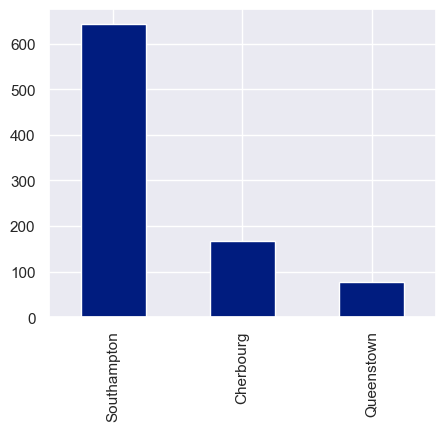

In [26]:
plt.figure(figsize=(5,4))
titanic.embark_town.value_counts().plot(kind='bar')

## Missing data

In [27]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot: >

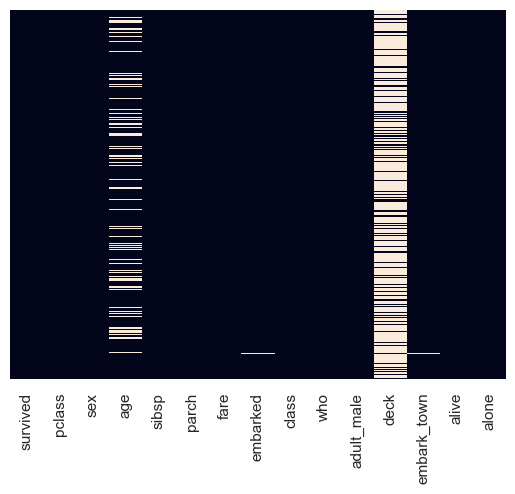

In [31]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False)

## More questions

How many people survived per gender?

[Text(0, 0, '81'), Text(0, 0, '233')]

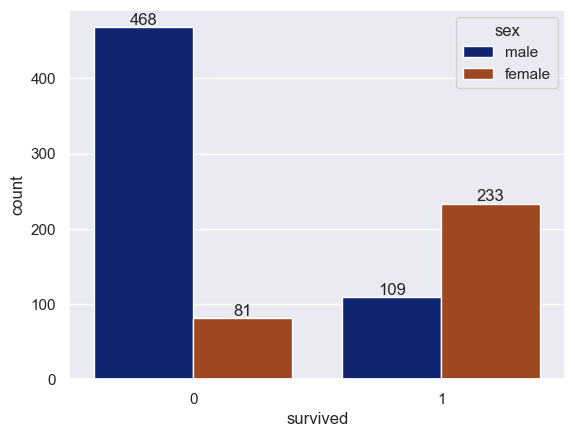

In [36]:
ax = sns.countplot(titanic, x='survived', hue='sex')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

How many people died per class?

[Text(0, 0, '372'), Text(0, 0, '119')]

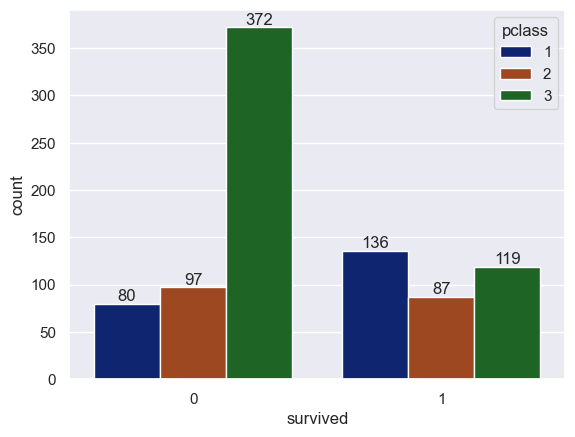

In [48]:
ax = sns.countplot(titanic, x='survived', hue='pclass')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])

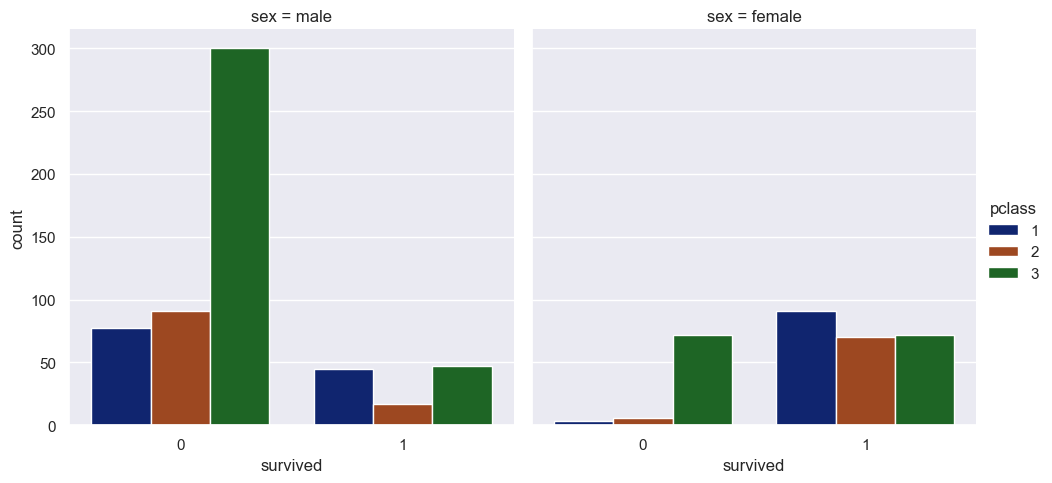

In [49]:
sns.catplot(titanic, x='survived', hue='pclass', col='sex', kind='count')

Age Distribution:

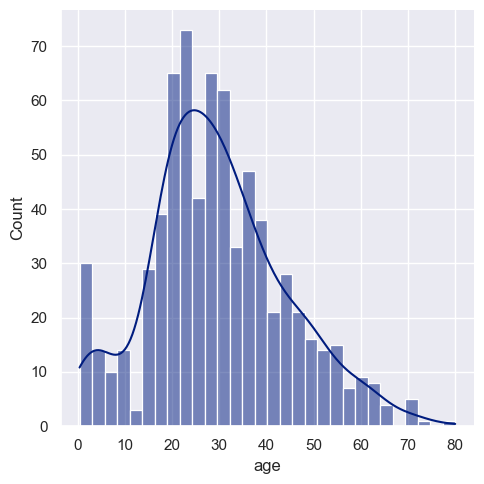

In [55]:
sns.displot(titanic, x='age', bins=30, kde=True )

<AxesSubplot: xlabel='age', ylabel='fare'>

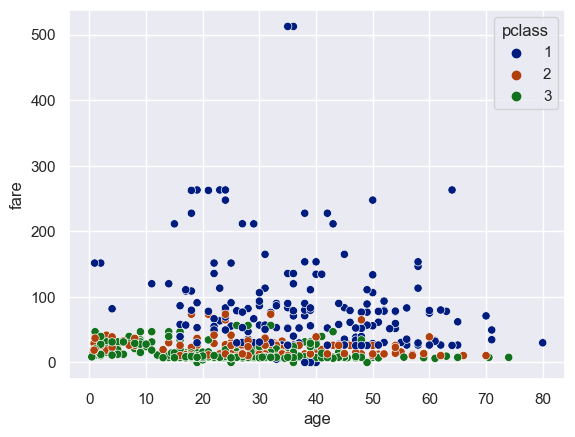

In [70]:
sns.scatterplot(titanic, x='age', y='fare', hue='pclass', palette='dark')

<AxesSubplot: xlabel='age', ylabel='fare'>

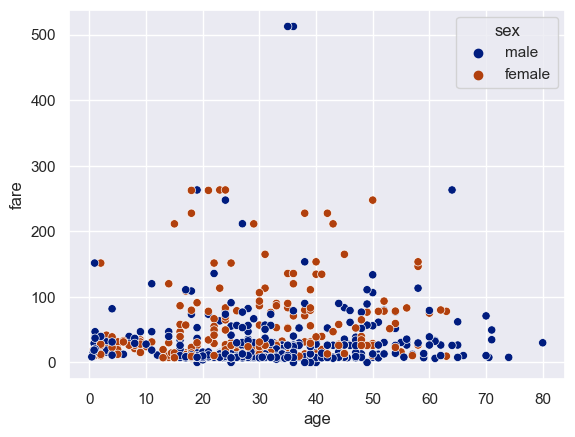

In [76]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex')

## Checking Correlation

In [77]:
correlation = titanic.corr()
correlation

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [78]:
correlation.survived

survived      1.000000
pclass       -0.338481
age          -0.077221
sibsp        -0.035322
parch         0.081629
fare          0.257307
adult_male   -0.557080
alone        -0.203367
Name: survived, dtype: float64

<AxesSubplot: >

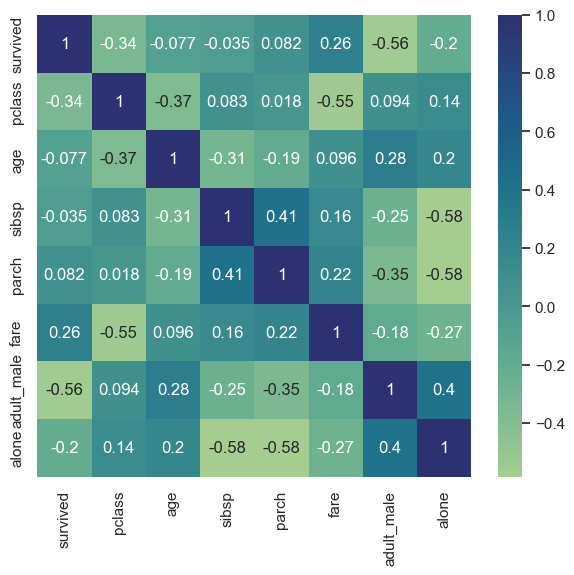

In [81]:
#### Visualizing correlation

plt.figure(figsize=(7,6))

sns.heatmap(correlation,annot=True,cmap='crest')